In [385]:
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile

# Configure default pyplot settings
plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')

<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# A comprehensive guide to spectral representations


* **Course AIS2201 - Digital Signal Processing**
* **Week 39, 2025**
* **Lecturer: Kai Erik Hoff**

# Non-stationary signals






* Term for signals where the frequency content varies over time
    * Applies to most real-world signals

* Beneficial to calculate *how* the frequency content varies over time

* Proposed solution:
    1. Divide the signal into shorter segments
    2. Calculate the DFT of each segment
    3. Combine the frequency informationn from all segments into a komplex matrix $X[k, m]$
        - $m$ is frequency index
        - $k$ references time time for frequency components

# Short-time Fourier Transform (STFT)

$$\Large X[k, m] = \sum_{n=k\cdot N}^{(k+1)\cdot N}x[n]\cdot e^{-j2\pi \frac{n\cdot m}{N}}$$



* Determining window length boils down to a balancing time-domain precision against frequency-domain resolution

* Zero padding and overlapping windows are appropriate tools to get the most out of the signal samples $x[n]$

# Spectrograms

<img src="../continuous_signals/figures/Fig18_Spectrogram1.png" width="50%" style="margin-left:100px" />

* Sequence of PSD "Slices" based on STFT

## Teoriquiz 1:
* Et signalopptak har en lengde på $L=40\ 000$ sampler. Det er ønskelig å generere et spektrogram der vinduslengden brukt i til frekvensanalye er $N=1\ 000$ sampler, og for å øke antallet "frames" i spektrogramemet benytter vi $50\%$ overlapping av signalvinduene.
    * For hvor mange individuelle tidsintervall vil vi få utregnet spektralinnhold? Sagt på en annen måte: hva blir det totale antallet signalvindu vi henter fra signalet?
    
Antall separate vindu:

$$ \frac{L}{N} \cdot 2 +1 = \frac{40000}{1000} \cdot 2 + 1 = 81$$

## Spectrograms in Python
* Create a spectrogram which shows the frequency content of the audio file `"orca.wav"` over time.
    * Study how the various parameters affect the displayed spectrogram.

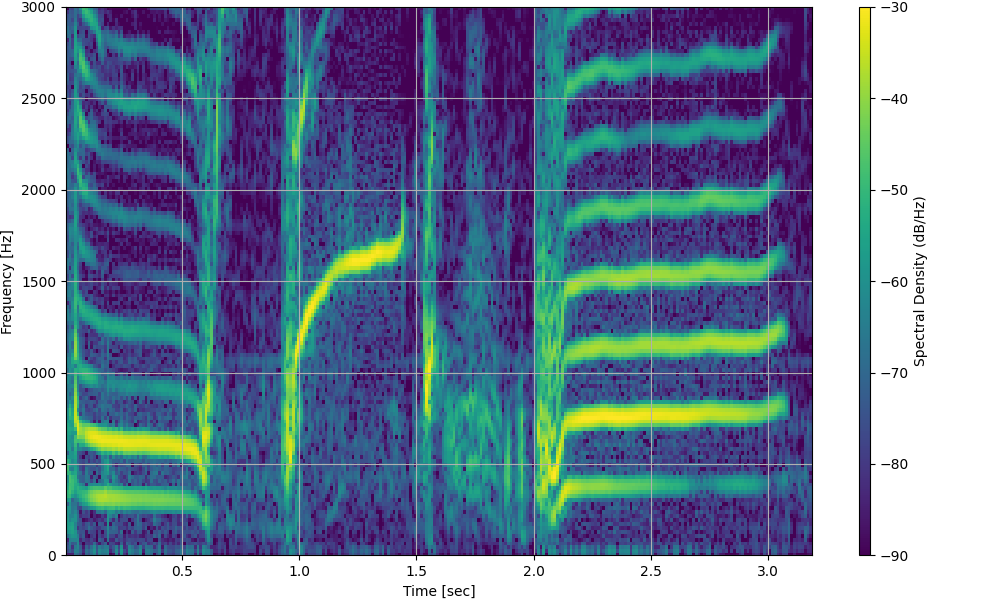

In [395]:
fs, data = wavfile.read(r'../data/orca.wav') # les audiofilen 'orca.wav' og lagre til variablene 'fs' og 'data'
xn = data/0x8000
N = 512

f_axis, t_axis, S_xx = sig.spectrogram(xn, 
                             fs, 
                             window = 'hamming', 
                             nperseg = N, 
                             noverlap = N//2, 
                             nfft = 2*N
                            )

plt.close(3);plt.figure(3, figsize=(10,6))

plt.pcolormesh(t_axis,            # Array med tidsstempel. Produsert av spectrogram()
               f_axis,            # Array med frekvenser. Produsert av spectrogram()
               10*np.log10(S_xx),  # Konvertering av spektrogrammatrise til logaritmisk skala
               vmax =-30,         # Høyeste dB-verdi på fargekartet
               vmin = -90,        # Laveste dB-verdi på fargekartet
               shading='auto'
               )
plt.colorbar(aspect=50, label=r'Spectral Density (dB/Hz)')

plt.ylim([0, 3000]) # Du kan justere på grensene i y-aksen dersom du vil inspisere en spesiell del av plottet
#plt.xlim([0, 300]) # Du kan justere på grensene i x-aksen dersom du vil inspisere en spesiell del av plottet
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout(pad=0.1, w_pad=1.0, h_pad=1.0)
plt.show()
from IPython.display import Audio
Audio(xn, rate=fs)


# Anvendelser av spektrogram

* Kartlegging av interferens i radiosignal.
* Kartlegging av frekvensinnhold til et lydsignal / vibrasjonssignal o.l.
* Talegjenkjenning
    * Jeg vil sterkt anbefale [denne videoen](https://www.youtube.com/watch?v=N780rQIXSgc&t=448s) som viser hvordan spektrogram brukes til å pre-prosessere talesignal før en maskinlæingsalgoritme skal trenes til å gjenkjenne talesignalene.
* Mye mer...

# Spørsmål?